In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/py37/lib/python3.7/site-packag

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 222us/step - loss: 2.6832 - accuracy: 0.5124 - val_loss: 1.7686 - val_accuracy: 0.6230
Epoch 2/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.4531 - accuracy: 0.6939 - val_loss: 1.3165 - val_accuracy: 0.7000
Epoch 3/20
7982/7982 [==============================] - ETA: 0s - loss: 1.0718 - accuracy: 0.77 - 1s 113us/step - loss: 1.0690 - accuracy: 0.7745 - val_loss: 1.1394 - val_accuracy: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.8352 - accuracy: 0.8277 - val_loss: 1.0350 - val_accuracy: 0.7790
Epoch 5/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.6625 - accuracy: 0.8629 - val_loss: 0.9585 - val_accuracy: 0.8060
Epoch 6/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.5242 - accuracy: 0.8911 - val_loss: 0.9158 - val_accuracy: 0.8100
Epoch 7/20
7982/7982 [===========

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

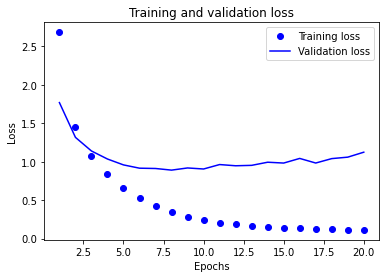

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

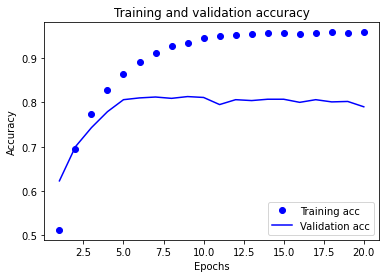

In [12]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 266us/step - loss: 2.1696 - acc: 0.5700 - val_loss: 1.3872 - val_acc: 0.6980
Epoch 2/8
7982/7982 [==============================] - 1s 167us/step - loss: 1.1014 - acc: 0.7623 - val_loss: 1.1063 - val_acc: 0.7640
Epoch 3/8
7982/7982 [==============================] - 1s 171us/step - loss: 0.7811 - acc: 0.8336 - val_loss: 0.9652 - val_acc: 0.7970
Epoch 4/8
7982/7982 [==============================] - 1s 168us/step - loss: 0.5718 - acc: 0.8797 - val_loss: 0.8764 - val_acc: 0.8190
Epoch 5/8
7982/7982 [==============================] - 1s 168us/step - loss: 0.4110 - acc: 0.9118 - val_loss: 0.9299 - val_acc: 0.8000
Epoch 6/8
7982/7982 [==============================] - 1s 171us/step - loss: 0.3192 - acc: 0.9311 - val_loss: 0.8933 - val_acc: 0.8070
Epoch 7/8
7982/7982 [==============================] - 2s 194us/step - loss: 0.2521 - acc: 0.9422 - val_loss: 0.9135 - val_acc: 0.8050
Epoch 8

In [17]:
results

[1.0085787291199844, 0.7880676984786987]

In [18]:
model.predict(x_test)

array([[2.5730618e-04, 3.5011495e-04, 4.8963524e-05, ..., 3.5081132e-05,
        1.7249935e-05, 6.9632056e-06],
       [3.3918500e-03, 4.0162325e-01, 5.6964164e-03, ..., 2.0422551e-05,
        9.2627262e-05, 2.4027815e-03],
       [3.6250977e-03, 9.2305303e-01, 8.3812093e-04, ..., 1.5557819e-04,
        1.6860593e-04, 1.4150778e-03],
       ...,
       [4.6838839e-05, 6.7804642e-05, 5.0455881e-05, ..., 2.1652762e-05,
        1.5600957e-05, 3.9391789e-06],
       [4.2149550e-03, 2.5454682e-01, 7.5766449e-03, ..., 5.2032707e-04,
        1.7228393e-03, 1.8560700e-03],
       [2.8381897e-03, 5.5787241e-01, 8.4155519e-03, ..., 2.4533583e-04,
        2.3088988e-04, 4.1009369e-04]], dtype=float32)